# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [62]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [63]:
# Load a dataset
data = pd.read_csv('/content/drive/MyDrive/CS430/MLA/car_price_data.csv')


In [64]:
#from google.colab import drive
#drive.mount('/content/drive')

In [65]:
# Check data
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [67]:
# Shape of the dataset
data.shape

(11914, 16)

In [68]:
# What are the column names
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [69]:
# What is the data type of each column
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


The dataset has 11914 rows and 16 columns.

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [70]:
# Check for missing values by column
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


There are missing values with most of them being in the Market Category column.

### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [71]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


The summary statistics for each numerical column can be seen from the summarization table.



### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

In [72]:
# Scale the msrp using standardscaler
scaler = StandardScaler()
data['MSRP'] = scaler.fit_transform(data[['MSRP']])

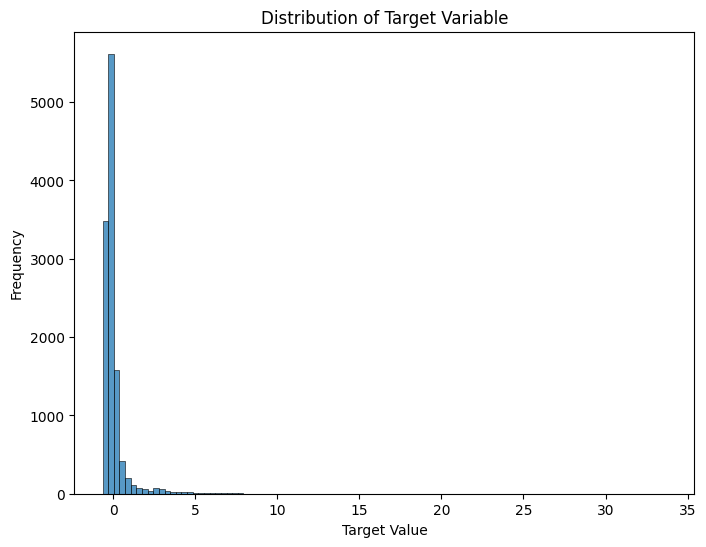

In [73]:
# Set the target in a variable
y = data['MSRP']

# Plot a histogram for the target
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=100)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()


The target is not normally distributed since it is not centered around it's mean.

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

In [74]:
# Find correlations between numerical variables
numerical_variables = data.select_dtypes(include=['number'])
correlation_matrix = numerical_variables.corr()
correlation_matrix

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


Highway MPG and city MPG are highly positively correlated. Engine HP is negatively correlated with both MPG columns. And Engine HP, Engine Cylinders, and year are positively correlated with the MSRP, with the Engine HP being the most positively correlated, Engine Cylinders second, and year third.

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

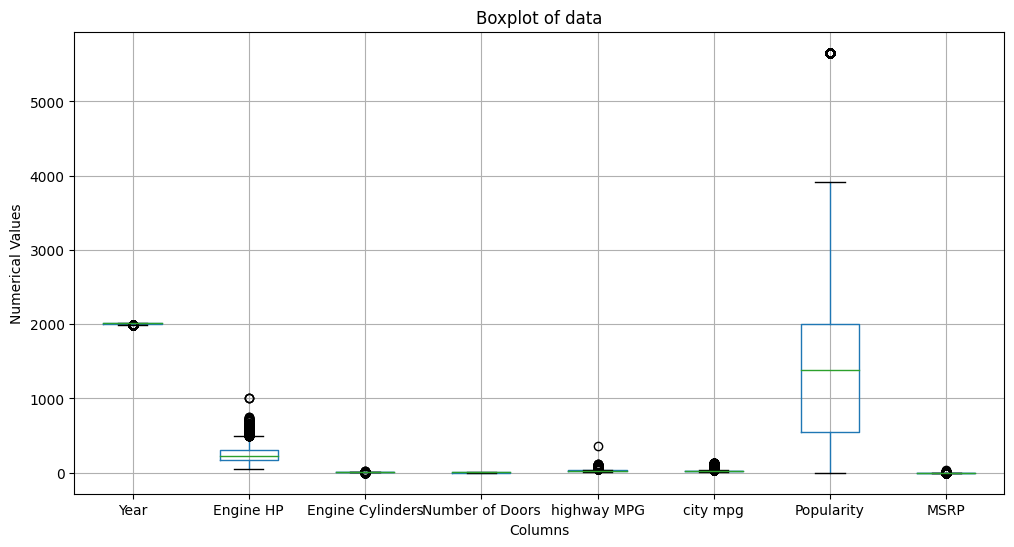

In [75]:
# Use boxplot to view outliers
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title('Boxplot of data')
plt.xlabel('Columns')
plt.ylabel('Numerical Values')
plt.show()

There are a lot of outliers in MSRP and other columns and must be handled. We will use IQR to identify outliers in numeric columns because the data is obviously not normally distributed. As we proved with the histogram.

In [76]:
# Use IQR to handle outliers in all numerical columns
numerical_variables = data.select_dtypes(include=['number']).columns
Q1 = data[numerical_variables].quantile(0.25)
Q3 = data[numerical_variables].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.000000
Engine HP            130.000000
Engine Cylinders       2.000000
Number of Doors        2.000000
highway MPG            8.000000
city mpg               6.000000
Popularity          1460.000000
MSRP                   0.353227
dtype: float64


In [77]:
outliers = data[((data[numerical_variables]<(Q1 - 1.5 * IQR)) |(data[numerical_variables]>(Q3 + 1.5 * IQR))).any(axis=1)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830 entries, 17 to 11905
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               2830 non-null   object 
 1   Model              2830 non-null   object 
 2   Year               2830 non-null   int64  
 3   Engine Fuel Type   2830 non-null   object 
 4   Engine HP          2772 non-null   float64
 5   Engine Cylinders   2819 non-null   float64
 6   Transmission Type  2830 non-null   object 
 7   Driven_Wheels      2830 non-null   object 
 8   Number of Doors    2824 non-null   float64
 9   Market Category    2078 non-null   object 
 10  Vehicle Size       2830 non-null   object 
 11  Vehicle Style      2830 non-null   object 
 12  highway MPG        2830 non-null   int64  
 13  city mpg           2830 non-null   int64  
 14  Popularity         2830 non-null   int64  
 15  MSRP               2830 non-null   float64
dtypes: float64(4), int64(4), ob

In [78]:
# Remove outliers
data_no_outliers = data[~((data[numerical_variables]<(Q1 - 1.5 * IQR)) |(data[numerical_variables]>(Q3 + 1.5 * IQR))).any(axis=1)]
data_no_outliers.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,0.092174
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,0.000919
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,-0.070620
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,-0.185416
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,-0.101399


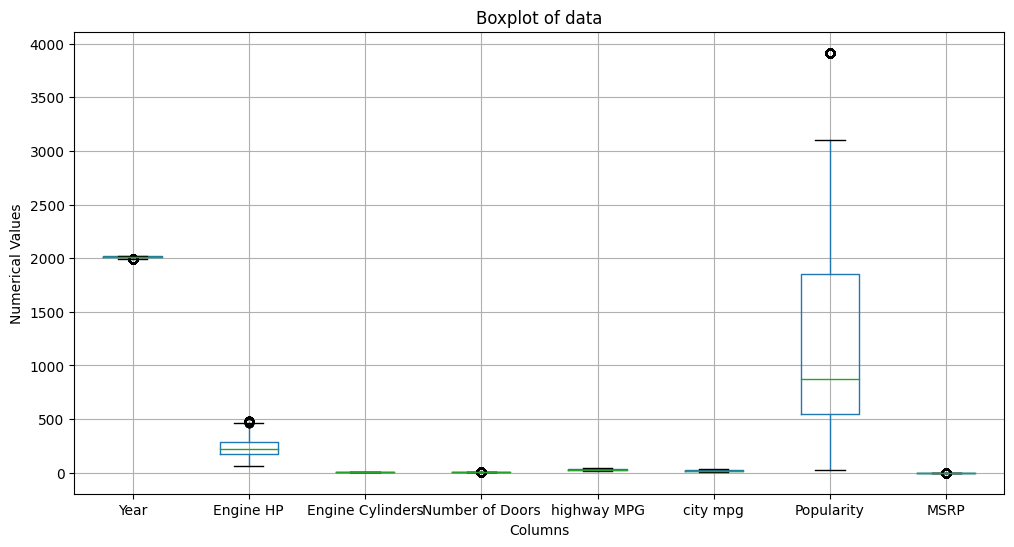

In [79]:
# Check with boxplot
plt.figure(figsize=(12, 6))
data_no_outliers.boxplot()
plt.title('Boxplot of data')
plt.xlabel('Columns')
plt.ylabel('Numerical Values')
plt.show()

There were 2830 outliers that are now removed. There are still outliers, but it is better than it was.

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

There are a lot of duplicates that must be removed which is done in the follow code.

In [80]:
# Handle for duplicated rows
data_no_outliers = data_no_outliers.drop_duplicates()

data_no_outliers.duplicated().sum()


0

In [81]:
# Check for null values. They will be handled in pipelining
data_no_outliers.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,11
Engine Cylinders,19
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,2817


### Split into features and target

In [82]:
# Target is MSRP and Features are everything else
X = data_no_outliers.drop('MSRP', axis=1)
y = data_no_outliers['MSRP']


### Feature Engineering

In [83]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns


### Preprocessing Pipelines

In [84]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object'))])

### Create a function to build and evaluate models using pipelines

In [85]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [87]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [88]:
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0038
R² Score: 0.9389
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0041
R² Score: 0.9353
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.0356
R² Score: 0.4356
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.0105
R² Score: 0.8341
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.0125
R² Score: 0.8020
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

Before Scaling MSRP: Every model has a riduculously high MSE which is likely due to the large values of the target. The R2 score isin the low to mid .90's except for polynomial regression. Polynomial regression had the highest MSE at around 3 times the rest of the models while also having the lowest R2 score, so it is safe to say it performed the worst in this case. Lasso appears to have performed the best as it had the lowest MSE by a significant margin while also having the highest R2 score. Regular linear regression performed the second best with a lower MSE and higher R2 score than polynomial regression and ridge. Then Ridge is the third best as it has MSE and R2 values in between polynomial (the worst) and linear (the 2nd best). Technically SGD didn't even converge so it performed the worst.

After Scaling MSRP: The MSE's improved dramatically with all of them being less than one meaning that every model proved to be quite accurate. Linear Regression and Ridge performed the best with Linear Regression slightly edging out Ridge, both of them having MSE's near 0.004 and R2 scores of near 0.93 which are both very good. The rest of them performed well but just not as well.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.